<a href="https://colab.research.google.com/github/ArifAygun/Applied-Machine-Learning-Foundations/blob/main/AA_AML_Foundations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linkedin Applied Machine Learning Foundations**

##**02_02 - 02_03**

## EDA & Cleaning: Exploring continuous features

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class
- **Sex** (str) - Sex of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

**This section focuses on exploring the `Pclass`, `Age`, `SibSp`, `Parch`, and `Fare` features.**

### Read in data

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive/')

#%cd /content/drive/My Drive/Linkedin/Applied_Machine_Learning_Foundations
%cd /content/drive/My Drive/Datasets/LinkedinDS/
titanic = pd.read_csv('titanic.csv')
titanic.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Datasets/LinkedinDS


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [61]:
# Drop all categorical features
cat_feat = ['PassengerId', 'Name', 'Ticket', 'Sex', 'Cabin', 'Embarked']
titanic.drop(cat_feat, axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [62]:
titanic.groupby('Survived').mean()

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.626179,0.553734,0.329690,22.117887
1,1.950292,28.343690,0.473684,0.464912,48.395408


In [63]:
titanic.groupby(titanic['Age'].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


### Explore continuous features

In [64]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Plot continuous features

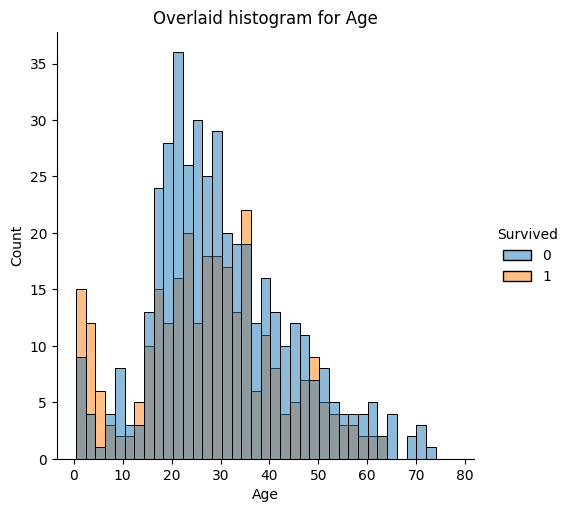

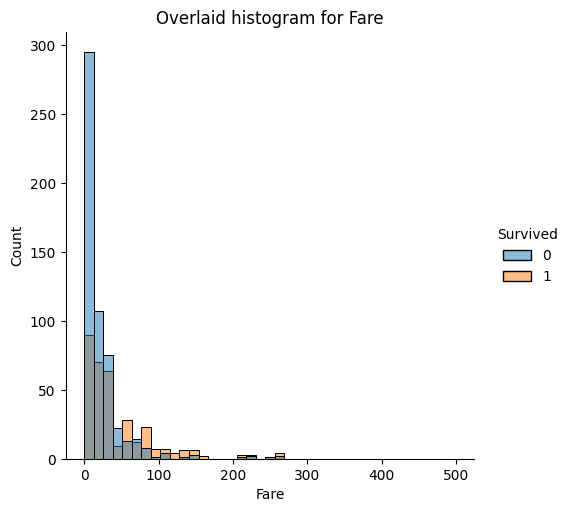

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

for i in ['Age', 'Fare']:
    died = list(titanic[titanic['Survived'] == 0][i].dropna())
    survived = list(titanic[titanic['Survived'] == 1][i].dropna())
    xmin = min(min(died), min(survived))
    xmax = max(max(died), max(survived))
    width = (xmax - xmin) / 40
    sns.displot(data=titanic, x=i, hue="Survived", kind="hist", bins=np.arange(xmin, xmax, width), color=['r', 'g'])
    plt.title('Overlaid histogram for {}'.format(i))
    plt.show()


<Figure size 640x480 with 0 Axes>

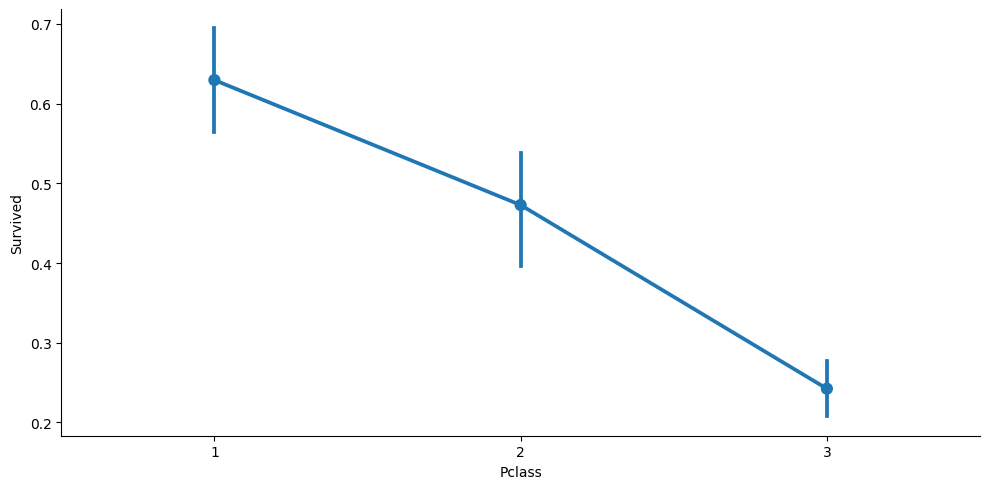

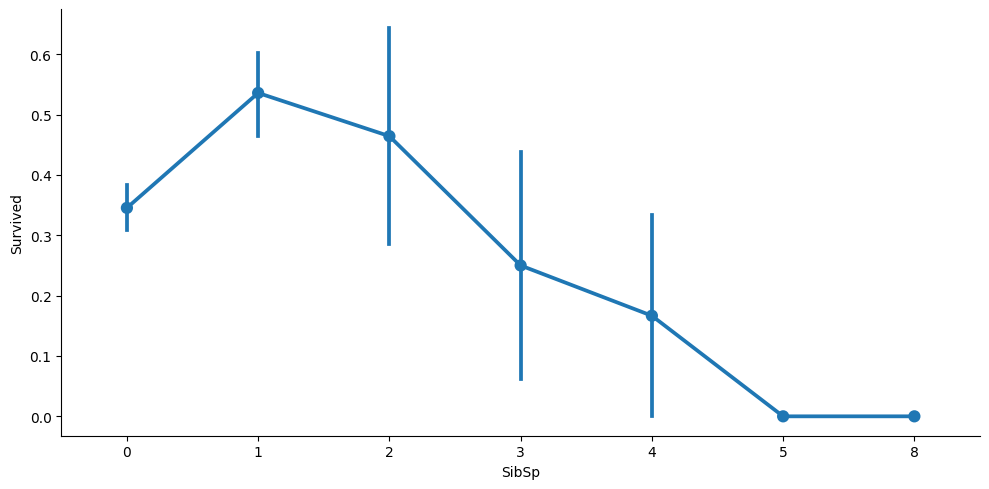

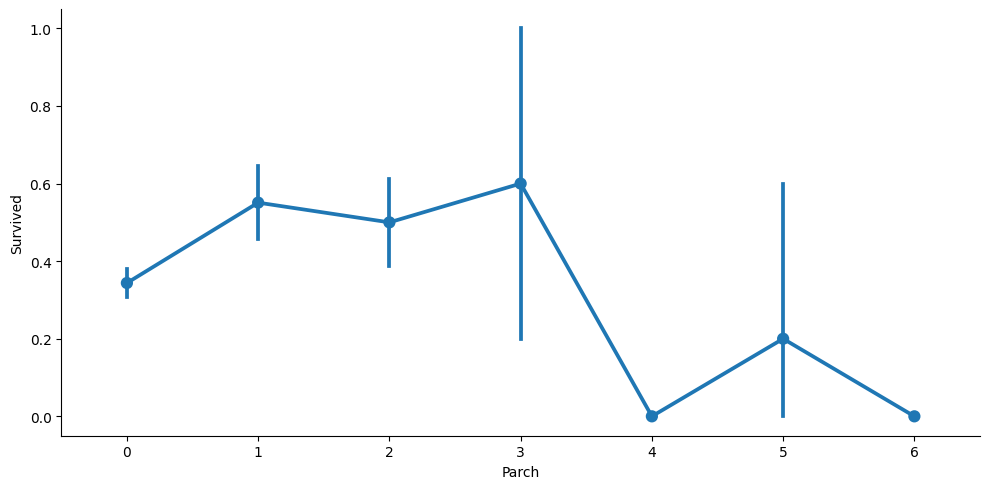

In [66]:
for i, col in enumerate(['Pclass', 'SibSp', 'Parch']):
  plt.figure(i)
  sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2,)


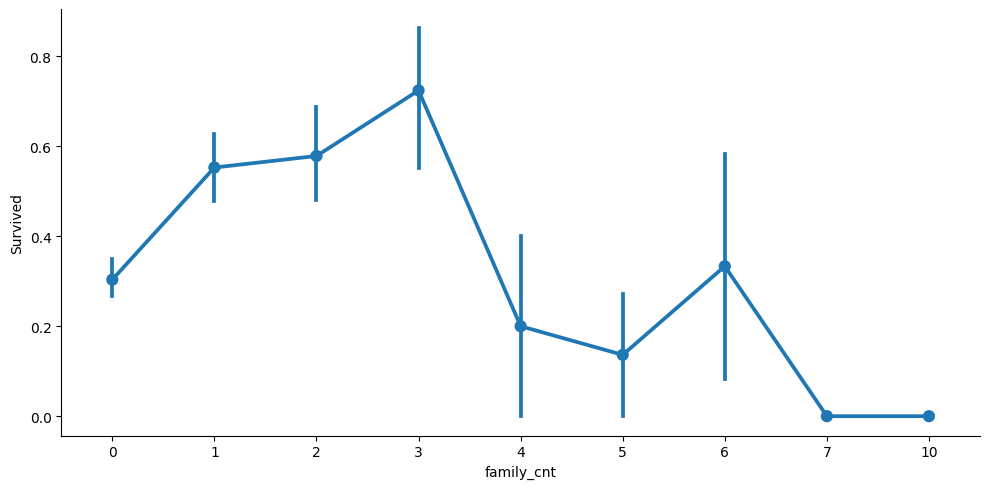

In [67]:
titanic['family_cnt'] = titanic['SibSp'] + titanic['Parch']
sns.catplot(x='family_cnt', y='Survived', data=titanic, kind='point', aspect=2,)

##**02_04**

## EDA & Cleaning: Cleaning continuous features

### Read in data

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive/')

#%cd /content/drive/My Drive/Linkedin/Applied_Machine_Learning_Foundations
%cd /content/drive/My Drive/Datasets/LinkedinDS/
titanic = pd.read_csv('titanic.csv')
titanic.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Datasets/LinkedinDS


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
# Drop irrelevant continuous variable
titanic.drop('PassengerId', axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Fill missing for `Age`

In [70]:
titanic.groupby(titanic['Age'].isnull()).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


In [71]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [72]:
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


### Combine `SibSp` & `Parch`

In [73]:
titanic['Family_cnt'] = titanic['SibSp'] + titanic['Parch']
titanic.drop(['SibSp', 'Parch'], axis=1, inplace=True)


In [74]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


#**02_05 - 02_06**

## EDA & Cleaning: Exploring categorical features

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class
- **Sex** (str) - Sex of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

**This section focuses on exploring the `Sex`, `Cabin`, and `Embarked` features.**

### Read in data

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive/')

#%cd /content/drive/My Drive/Linkedin/Applied_Machine_Learning_Foundations
%cd /content/drive/My Drive/Datasets/LinkedinDS/
titanic = pd.read_csv('titanic.csv')
titanic.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Datasets/LinkedinDS


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [76]:
# Drop all continuous features
cont_feat = ['PassengerId', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Fare']
titanic.drop(cont_feat, axis=1, inplace=True)
titanic.head()

,Survived,Sex,Ticket,Cabin,Embarked
0,0,male,A/5 21171,NaN,S
1,1,female,PC 17599,C85,C
2,1,female,STON/O2. 3101282,NaN,S
3,1,female,113803,C123,S
4,0,male,373450,NaN,S


### Explore categorical features

Explore `Sex`, `Cabin`, and `Embarked`.

In [77]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Sex       891 non-null    object
 2   Ticket    891 non-null    object
 3   Cabin     204 non-null    object
 4   Embarked  889 non-null    object
dtypes: int64(1), object(4)
memory usage: 34.9+ KB


In [78]:
titanic.groupby(titanic['Cabin'].isnull()).mean()

,Survived
Cabin,
False,0.666667
True,0.299854


In [79]:
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0,1)
titanic.head(10)

,Survived,Sex,Ticket,Cabin,Embarked,Cabin_ind
0,0,male,A/5 21171,NaN,S,0
1,1,female,PC 17599,C85,C,1
2,1,female,STON/O2. 3101282,NaN,S,0
3,1,female,113803,C123,S,1
4,0,male,373450,NaN,S,0
5,0,male,330877,NaN,Q,0
6,0,male,17463,E46,S,1
7,0,male,349909,NaN,S,0
8,1,female,347742,NaN,S,0
9,1,female,237736,NaN,C,0


### Plot categorical features

<Figure size 640x480 with 0 Axes>

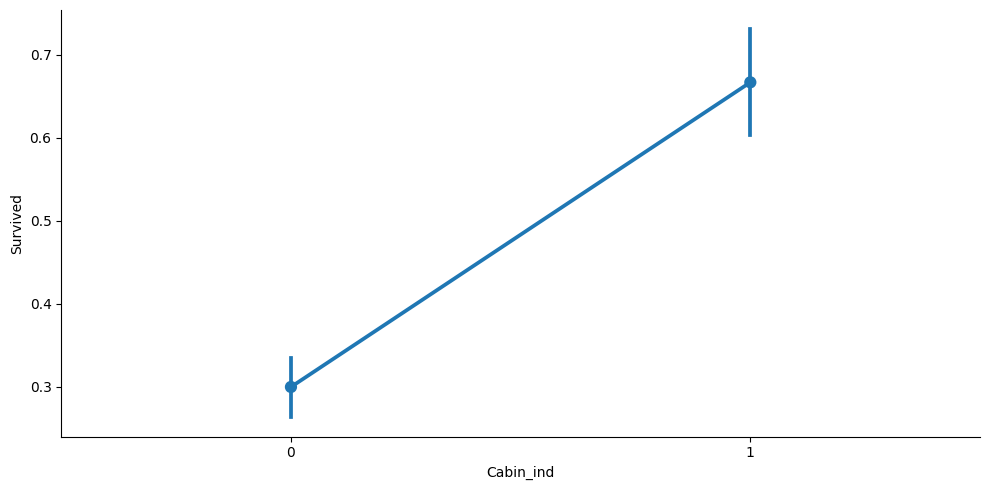

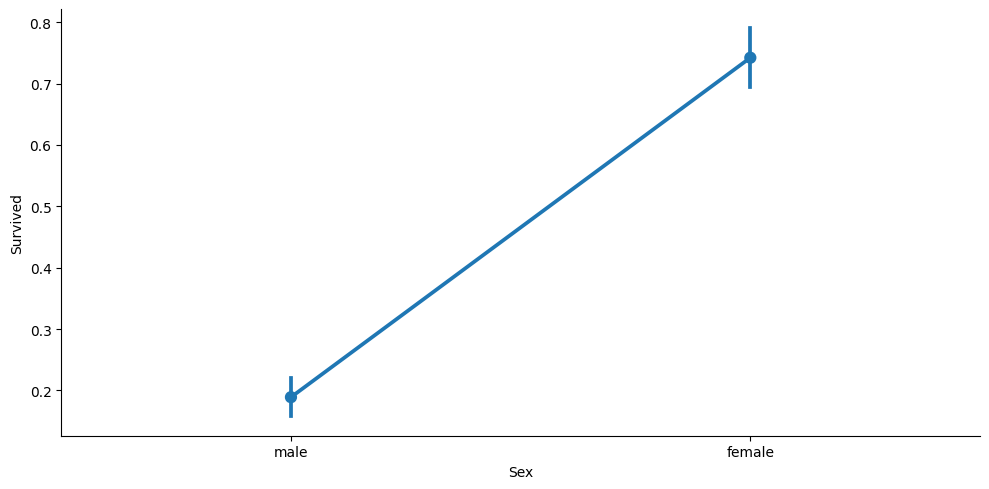

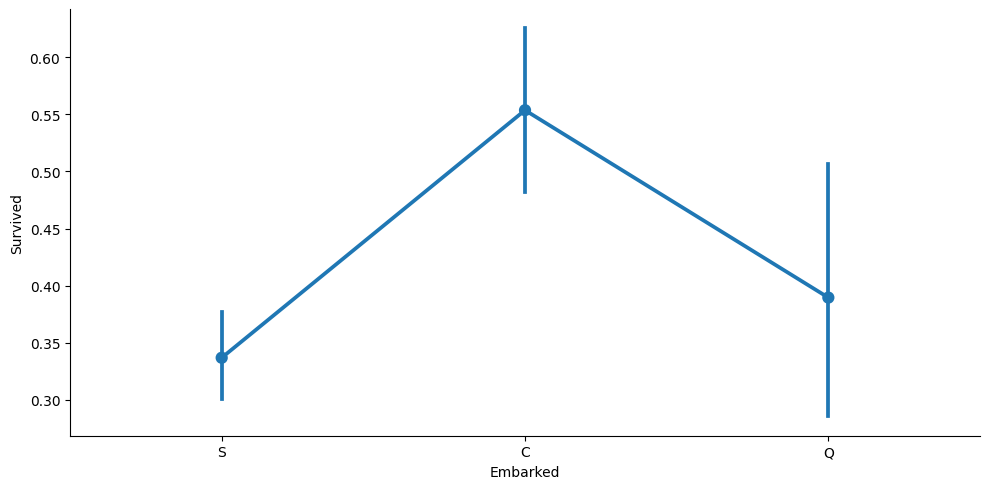

In [80]:
for i, col in enumerate(['Cabin_ind', 'Sex', 'Embarked']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2, )

In [81]:
# Create the pivot table
pivot_table_sex = titanic.pivot_table('Survived', index='Sex', columns='Embarked', aggfunc='count')
pivot_table_sex

Embarked,C,Q,S
Sex,,,
female,73,36,203
male,95,41,441


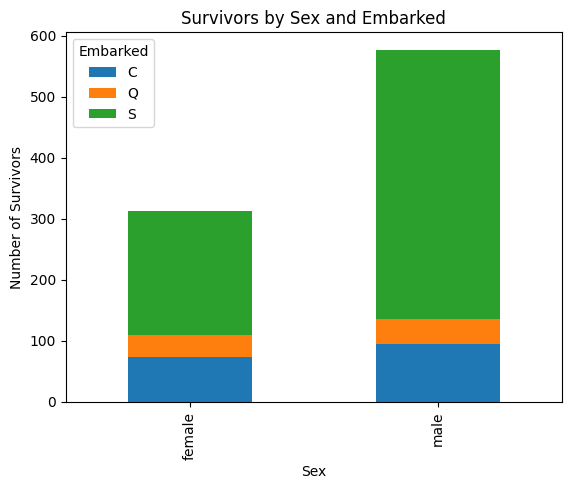

In [82]:
# Create the stacked bar chart
pivot_table_sex.plot(kind='bar', stacked=True)

# Set the title and axes labels
plt.title('Survivors by Sex and Embarked')
plt.xlabel('Sex')
plt.ylabel('Number of Survivors')

# Show the chart
plt.show()

In [83]:
# Create the pivot table
pivot_table_cabin = titanic.pivot_table('Survived', index='Cabin_ind', columns='Embarked', aggfunc='count')
pivot_table_cabin

Embarked,C,Q,S
Cabin_ind,,,
0,99,73,515
1,69,4,129


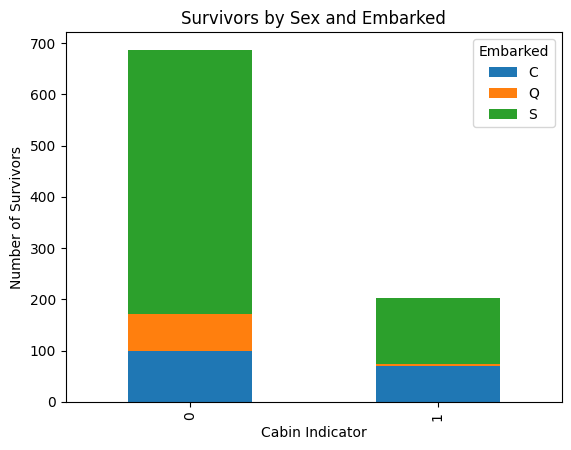

In [84]:
# Create the stacked bar chart
pivot_table_cabin.plot(kind='bar', stacked=True)

# Set the title and axes labels
plt.title('Survivors by Sex and Embarked')
plt.xlabel('Cabin Indicator')
plt.ylabel('Number of Survivors')

# Show the chart
plt.show()

#**02_07**

### Read in data

In [85]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

from google.colab import drive
drive.mount('/content/drive/')

#%cd /content/drive/My Drive/Linkedin/Applied_Machine_Learning_Foundations
%cd /content/drive/My Drive/Datasets/LinkedinDS/
titanic = pd.read_csv('titanic.csv')

titanic.drop(['Name', 'Ticket'], axis=1, inplace=True)
titanic.head()

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Datasets/LinkedinDS


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


### Create indicator for `Cabin`

In [86]:
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0, 1)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_ind
0,1,0,3,male,22.0,1,0,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,71.2833,C85,C,1
2,3,1,3,female,26.0,0,0,7.9250,NaN,S,0
3,4,1,1,female,35.0,1,0,53.1000,C123,S,1
4,5,0,3,male,35.0,0,0,8.0500,NaN,S,0


### Convert `Sex` to numeric

In [87]:
gender_num = {'male': 0, 'female': 1}

titanic['Sex'].map(gender_num)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [88]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Cabin_ind
0,1,0,3,male,22.0,1,0,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,71.2833,C85,C,1
2,3,1,3,female,26.0,0,0,7.9250,NaN,S,0
3,4,1,1,female,35.0,1,0,53.1000,C123,S,1
4,5,0,3,male,35.0,0,0,8.0500,NaN,S,0


### Drop `Cabin` and `Embarked`

In [89]:
titanic.drop(['Cabin', 'Embarked'], axis=1, inplace=True)
titanic.head

<bound method NDFrame.head of      PassengerId  Survived  Pclass     Sex   Age  SibSp  Parch     Fare  \
0              1         0       3    male  22.0      1      0   7.2500   
1              2         1       1  female  38.0      1      0  71.2833   
2              3         1       3  female  26.0      0      0   7.9250   
3              4         1       1  female  35.0      1      0  53.1000   
4              5         0       3    male  35.0      0      0   8.0500   
..           ...       ...     ...     ...   ...    ...    ...      ...   
886          887         0       2    male  27.0      0      0  13.0000   
887          888         1       1  female  19.0      0      0  30.0000   
888          889         0       3  female   NaN      1      2  23.4500   
889          890         1       1    male  26.0      0      0  30.0000   
890          891         0       3    male  32.0      0      0   7.7500   

     Cabin_ind  
0            0  
1            1  
2            0  
3

#**03_02**

##**Measuring Success: Splitting up the data for train, validation, and test set**

Split the dataset up into the following segments:
1. Training Data: 60%
2. Validation Data: 20%
3. Test Data: 20%

### Read in data

In [90]:
import pandas as pd
from sklearn.model_selection import train_test_split

%cd /content/drive/My Drive/Datasets/LinkedinDS/
titanic = pd.read_csv('titanic.csv')
titanic.head()

/content/drive/My Drive/Datasets/LinkedinDS


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Split into train, validation, and test set

In [91]:
features = titanic.drop('Survived', axis=1)
labels = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [92]:
print(len(labels), len(y_train), len(y_val), len(y_test))

891 534 179 178


#**05_02**

#**Pipeline: Clean Continuous Features**

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class
- **Sex** (str) - Sex of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

**This notebook will implement some of the cleaning that was done in Section 2: EDA & Data Cleaning**

![Clean Data](../../img/clean_data.png)

### Read in Data

In [93]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline


%cd /content/drive/My Drive/Datasets/LinkedinDS/
titanic = pd.read_csv('titanic.csv')
titanic.head()

/content/drive/My Drive/Datasets/LinkedinDS


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Clean continuous variables
1. Fill in missing values for `Age`
2. Combine `SibSp` & `Parch`
3. Drop irrelevant/repetitive variables (`SibSp`, `Parch`, `PassengerId`)

#### Fill missing for `Age`

In [94]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [95]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

#### Combine `SibSp` & `Parch`

<Figure size 640x480 with 0 Axes>

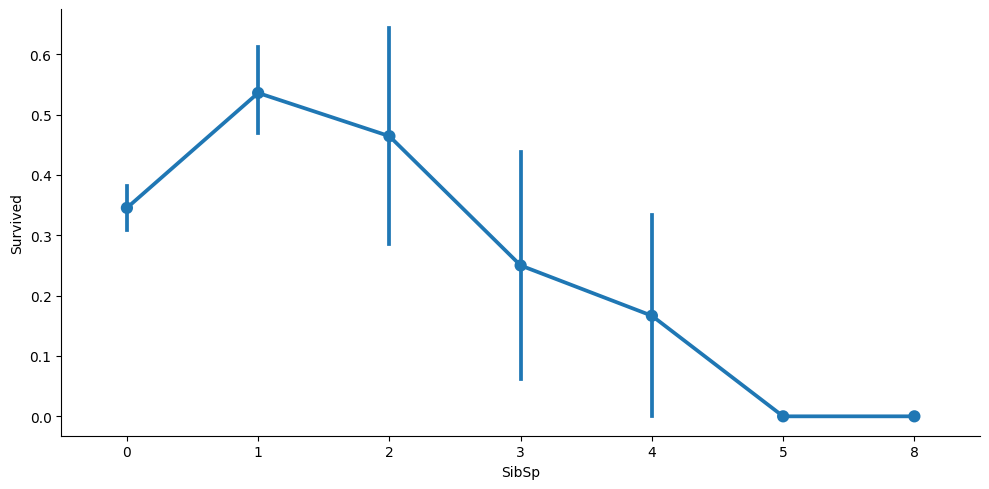

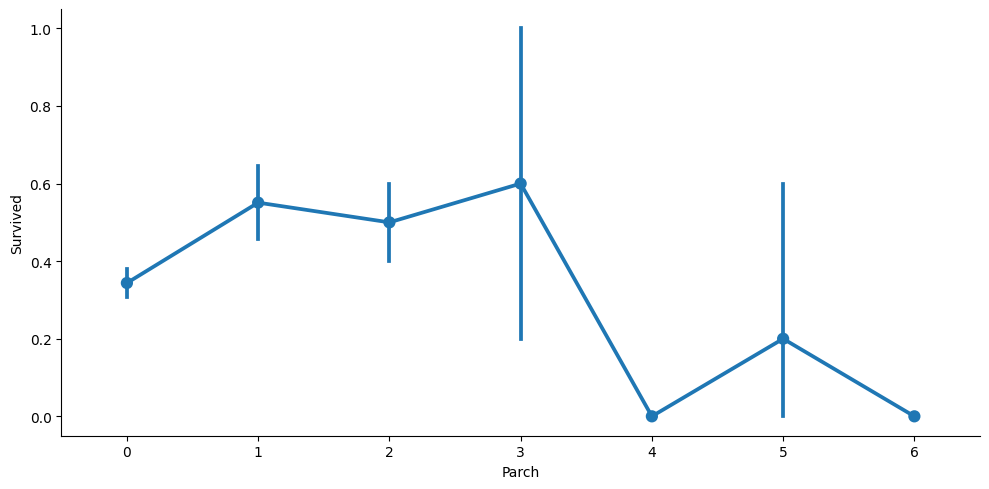

In [96]:
for i, col in enumerate(['SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2, )

In [97]:
titanic['Family_cnt'] = titanic['SibSp'] + titanic['Parch']

#### Drop unnnecessary variables

In [98]:
titanic.drop(['PassengerId', 'SibSp', 'Parch'], axis=1, inplace=True)

In [99]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


### Write out cleaned data

In [100]:
titanic.to_csv('/content/drive/My Drive/Datasets/LinkedinDS//titanic_cleaned.csv', index=False)

#**05_03**

# **Pipeline: Clean Categorical Features**

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class
- **Sex** (str) - Sex of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

**This notebook will implement some of the cleaning that was done in Section 2: EDA & Data Cleaning**

![Clean Data](../../img/clean_data.png)

### Read in Data

In [101]:
import numpy as np
import pandas as pd

#titanic = pd.read_csv('titanic_cleaned.csv')
titanic = pd.read_csv('/content/drive/My Drive/Datasets/LinkedinDS//titanic_cleaned.csv')
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


### Clean categorical variables
1. Create an indicator variable in place of `Cabin`
2. Convert `Sex` to a numeric variable
3. Drop irrelevant/repetitive variables (`Cabin`, `Embarked`, `Name`, `Ticket`)

#### Create indicator for `Cabin`

In [102]:
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0,1)

#### Convert `Sex` to numeric

In [103]:
gender_num = {'male': 0, 'female': 1}

titanic['Sex'] = titanic['Sex'].map(gender_num)

#### Drop unnecessary variables

In [104]:
titanic.drop(['Cabin', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


### Write out cleaned data

In [105]:
titanic.to_csv('/content/drive/My Drive/Datasets/LinkedinDS//titanic_cleaned.csv', index=False)

#**05_04**

# **Pipeline: Split data into train, validation, and test set**
**kalın metin**
Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

In this section, we will split the data into train, validation, and test set in preparation for fitting a basic model in the next section.

### Read in Data

In [106]:
import pandas as pd
from sklearn.model_selection import train_test_split

titanic = pd.read_csv('/content/drive/My Drive/Datasets/LinkedinDS//titanic_cleaned.csv')
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [107]:
features = titanic.drop('Survived', axis=1)
labels = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(features,labels, test_size=0.4, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(X_test,y_test, test_size=0.5, random_state=42)

In [108]:
for dataset in [y_train,y_val, y_test]:
  print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


### Write out data

In [109]:
X_train.to_csv('/content/drive/My Drive/Datasets/LinkedinDS/train_features.csv', index=False)
X_val.to_csv('/content/drive/My Drive/Datasets/LinkedinDS/val_features.csv', index=False)
X_test.to_csv('/content/drive/My Drive/Datasets/LinkedinDS/test_features.csv', index=False)

y_train.to_csv('/content/drive/My Drive/Datasets/LinkedinDS/train_labels.csv', index=False)
y_val.to_csv('/content/drive/My Drive/Datasets/LinkedinDS/val_labels.csv', index=False)
y_test.to_csv('/content/drive/My Drive/Datasets/LinkedinDS/test_labels.csv', index=False)

#**05_05**

## Pipeline: Fit a basic model

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

In this section, we will fit and evaluate a basic model using 5-fold Cross-Validation.

### Read in data



In [110]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

tr_features = pd.read_csv('/content/drive/My Drive/Datasets/LinkedinDS/train_features.csv')
tr_labels = pd.read_csv('/content/drive/My Drive/Datasets/LinkedinDS/train_labels.csv', header=None)[1:]

### Fit and evaluate a basic model using 5-fold Cross-Validation


In [111]:
rf = RandomForestClassifier()
scores = cross_val_score(rf, tr_features, tr_labels.values.ravel(), cv=5)
scores

array([0.81308411, 0.82242991, 0.80373832, 0.78504673, 0.83018868])

#**05_06**

# **Pipeline: Tune hyperparameters**
Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

In this section, we will tune the hyperparameters for the basic model we fit in the last section.

### Read in data



In [115]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

tr_features = pd.read_csv('/content/drive/My Drive/Datasets/LinkedinDS/train_features.csv')
tr_labels = pd.read_csv('/content/drive/My Drive/Datasets/LinkedinDS/train_labels.csv', header=None)[1:]

### Hyperparameter tuning



In [116]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [117]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5,50,100],
    'max_depth': [2,10,20,None]
}

cv = GridSearchCV(rf, parameters, cv=5)

cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 10, 'n_estimators': 100}

0.781 (+/-0.086) for {'max_depth': 2, 'n_estimators': 5}
0.811 (+/-0.114) for {'max_depth': 2, 'n_estimators': 50}
0.796 (+/-0.119) for {'max_depth': 2, 'n_estimators': 100}
0.818 (+/-0.081) for {'max_depth': 10, 'n_estimators': 5}
0.815 (+/-0.044) for {'max_depth': 10, 'n_estimators': 50}
0.82 (+/-0.044) for {'max_depth': 10, 'n_estimators': 100}
0.8 (+/-0.027) for {'max_depth': 20, 'n_estimators': 5}
0.809 (+/-0.04) for {'max_depth': 20, 'n_estimators': 50}
0.803 (+/-0.036) for {'max_depth': 20, 'n_estimators': 100}
0.82 (+/-0.059) for {'max_depth': None, 'n_estimators': 5}
0.809 (+/-0.031) for {'max_depth': None, 'n_estimators': 50}
0.811 (+/-0.027) for {'max_depth': None, 'n_estimators': 100}


#**05_07 - 05_08**

## Pipeline: Evaluate results on validation set

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

In this section, we will use what we learned in last section to fit the best few models on the full training set and then evaluate the model on the validation set.

### Read in data

![Eval on Validation](../../img/evaluate_on_validation.png)

In [121]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

tr_features = pd.read_csv('/content/drive/My Drive/Datasets/LinkedinDS/train_features.csv')
tr_labels = pd.read_csv('/content/drive/My Drive/Datasets/LinkedinDS/train_labels.csv', header=None)[1:]

val_features = pd.read_csv('/content/drive/My Drive/Datasets/LinkedinDS/val_features.csv')
val_labels = pd.read_csv('/content/drive/My Drive/Datasets/LinkedinDS/val_labels.csv', header=None)[1:]

te_features = pd.read_csv('/content/drive/My Drive/Datasets/LinkedinDS/test_features.csv')
te_labels = pd.read_csv('/content/drive/My Drive/Datasets/LinkedinDS/test_labels.csv', header=None)[1:]

### Fit best models on full training set

Results from last section:
```
0.76 (+/-0.116) for {'max_depth': 2, 'n_estimators': 5}
0.796 (+/-0.119) for {'max_depth': 2, 'n_estimators': 50}
0.803 (+/-0.117) for {'max_depth': 2, 'n_estimators': 100}
--> 0.828 (+/-0.074) for {'max_depth': 10, 'n_estimators': 5}
0.816 (+/-0.028) for {'max_depth': 10, 'n_estimators': 50}
--> 0.826 (+/-0.046) for {'max_depth': 10, 'n_estimators': 100}
0.785 (+/-0.106) for {'max_depth': 20, 'n_estimators': 5}
0.813 (+/-0.027) for {'max_depth': 20, 'n_estimators': 50}
0.809 (+/-0.029) for {'max_depth': 20, 'n_estimators': 100}
0.794 (+/-0.04) for {'max_depth': None, 'n_estimators': 5}
0.809 (+/-0.037) for {'max_depth': None, 'n_estimators': 50}
--> 0.818 (+/-0.035) for {'max_depth': None, 'n_estimators': 100}
```

In [123]:
rf1 = RandomForestClassifier(n_estimators=5, max_depth=10)
rf1.fit(tr_features, tr_labels.values.ravel())

rf2 = RandomForestClassifier(n_estimators=100, max_depth=10)
rf2.fit(tr_features, tr_labels.values.ravel())

rf3 = RandomForestClassifier(n_estimators=100, max_depth=None)
rf3.fit(tr_features, tr_labels.values.ravel())

RandomForestClassifier()

### Evaluate models on validation set



In [132]:
for mdl in [rf1,rf2,rf3]:
    y_pred = mdl.predict(val_features)
    accuracy = round(accuracy_score(val_labels, y_pred), 3)
    precision = round(precision_score(val_labels, y_pred, pos_label='0'), 3)

    #precision = round(precision_score(val_labels, y_pred), 3)
    recall = round(recall_score(val_labels, y_pred, pos_label='0'), 3)
    print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(mdl.max_depth,
                                                                         mdl.n_estimators,
                                                                         accuracy,
                                                                         precision,
                                                                         recall))

MAX DEPTH: 10 / # OF EST: 5 -- A: 0.793 / P: 0.8 / R: 0.854
MAX DEPTH: 10 / # OF EST: 100 -- A: 0.832 / P: 0.817 / R: 0.913
MAX DEPTH: None / # OF EST: 100 -- A: 0.799 / P: 0.802 / R: 0.864


### Evaluate the best model on the test set



In [136]:
y_pred = rf2.predict(te_features)
accuracy = round(accuracy_score(te_labels,y_pred), 3)
precision = round(precision_score(te_labels,y_pred, pos_label='0'), 3)
recall = round(recall_score(te_labels,y_pred, pos_label='0'), 3)
print('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(rf2.max_depth,
                                                                     rf2.n_estimators,
                                                                     accuracy,
                                                                     precision,
                                                                     recall))

MAX DEPTH: 10 / # OF EST: 100 -- A: 0.792 / P: 0.811 / R: 0.876
